# IE7300 Final Project


Group 10

Srinidhi Aduri aduri.s@northeastern.edu

Sucharith Prasanna Krishna prasannakrishna.s@northeastern.edu

Sameera Mandalika mandalika.s@northeastern.edu

Mandar Jadhav jadhav.man@northeastern.edu

Dat Tran tran.dat@northeastern.edu








In [1]:
pip install ucimlrepo

# Loading the dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)


{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [4]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,18,0,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,1,28,0,0,0,1,1,0,...,1,0,1,0,0,0,0,2,5,2
253678,1,0,1,23,0,0,0,0,1,1,...,1,0,3,0,0,0,1,7,5,1


In [5]:
y

,Diabetes_binary
0,0
1,0
2,0
3,0
4,0
...,...
253675,0
253676,1
253677,0
253678,0


In [6]:
cdc_diabetes_health_indicators['data'].keys()

dict_keys(['ids', 'features', 'targets', 'original', 'headers'])

In [7]:
original_set=cdc_diabetes_health_indicators['data']['original']

In [8]:
original_set

,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0,1,1,1,40,1,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,1,0,0,0,0,25,1,0,0,1,...,0,1,3,0,0,0,0,7,6,1
2,2,0,1,1,1,28,0,0,0,0,...,1,1,5,30,30,1,0,9,4,8
3,3,0,1,0,1,27,0,0,0,1,...,1,0,2,0,0,0,0,11,3,6
4,4,0,1,1,1,24,0,0,0,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,253675,0,1,1,1,45,0,0,0,0,...,1,0,3,0,5,0,1,5,6,7
253676,253676,1,1,1,1,18,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,253677,0,0,0,1,28,0,0,0,1,...,1,0,1,0,0,0,0,2,5,2
253678,253678,0,1,0,1,23,0,0,0,0,...,1,0,3,0,0,0,1,7,5,1


In [9]:
feature_set = cdc_diabetes_health_indicators['data']['features']

In [10]:
cdc_diabetes_health_indicators['data']['headers']

Index(['ID', 'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income'],
      dtype='object')

In [11]:
original_set.columns

Index(['ID', 'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income'],
      dtype='object')

In [12]:
original_set['Diabetes_binary'].value_counts(dropna=True)

Diabetes_binary
0    218334
1     35346
Name: count, dtype: int64

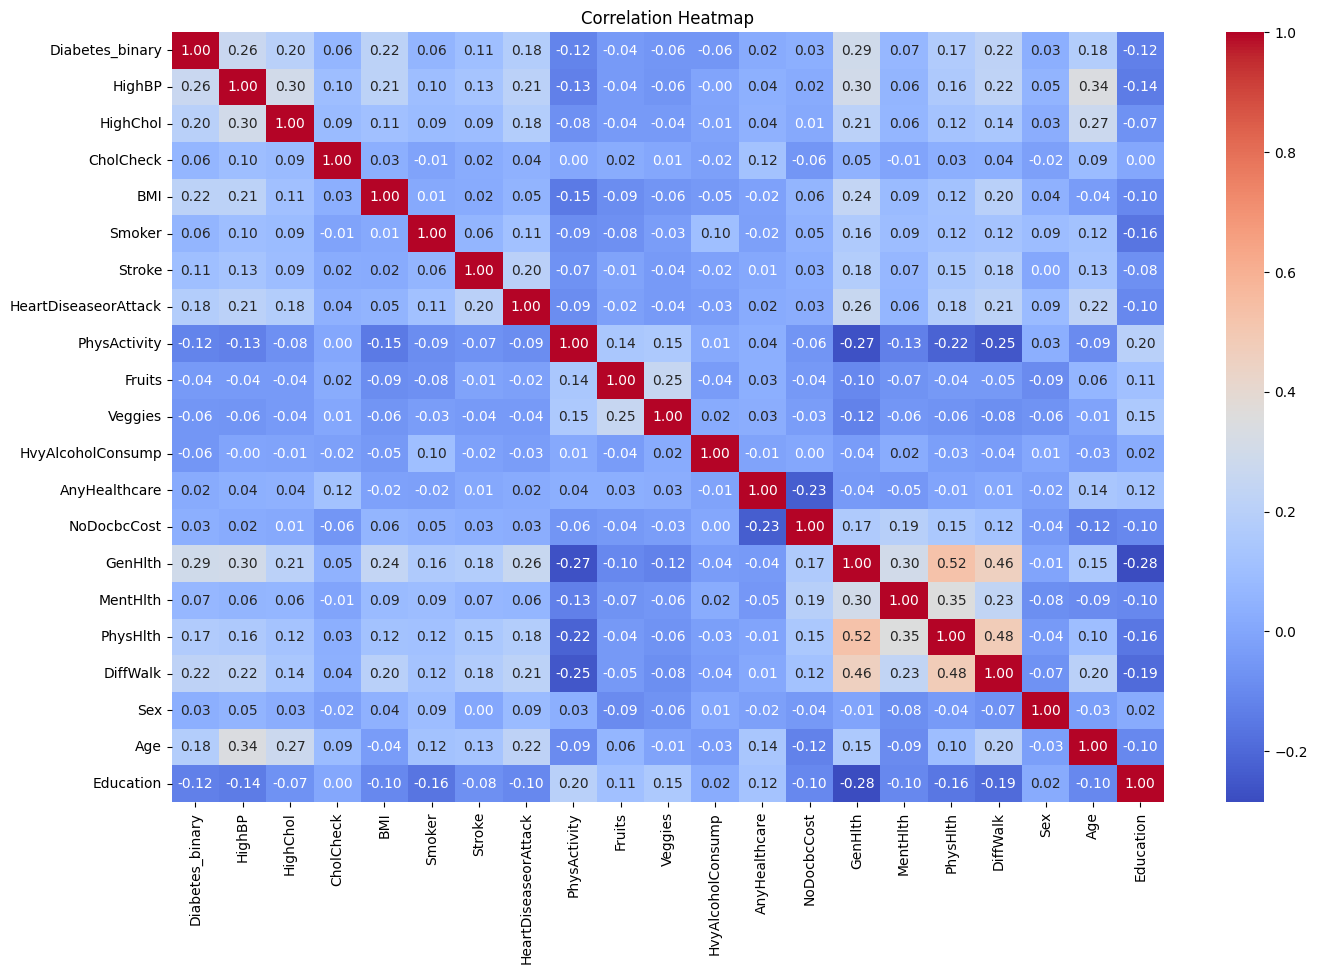

In [13]:
# Calculate the correlation matrix
correlation_matrix = original_set[
    ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
     'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
     'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
     'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
     'Education']
].corr()

# Generate a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
original_set.describe()

,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,126839.500000,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,73231.252481,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,63419.750000,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,126839.500000,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,190259.250000,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,253679.000000,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [15]:
original_set.isnull().sum()

ID                      0
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

# EDA - Visualization

In [ ]:
from scipy.stats import chi2_contingency

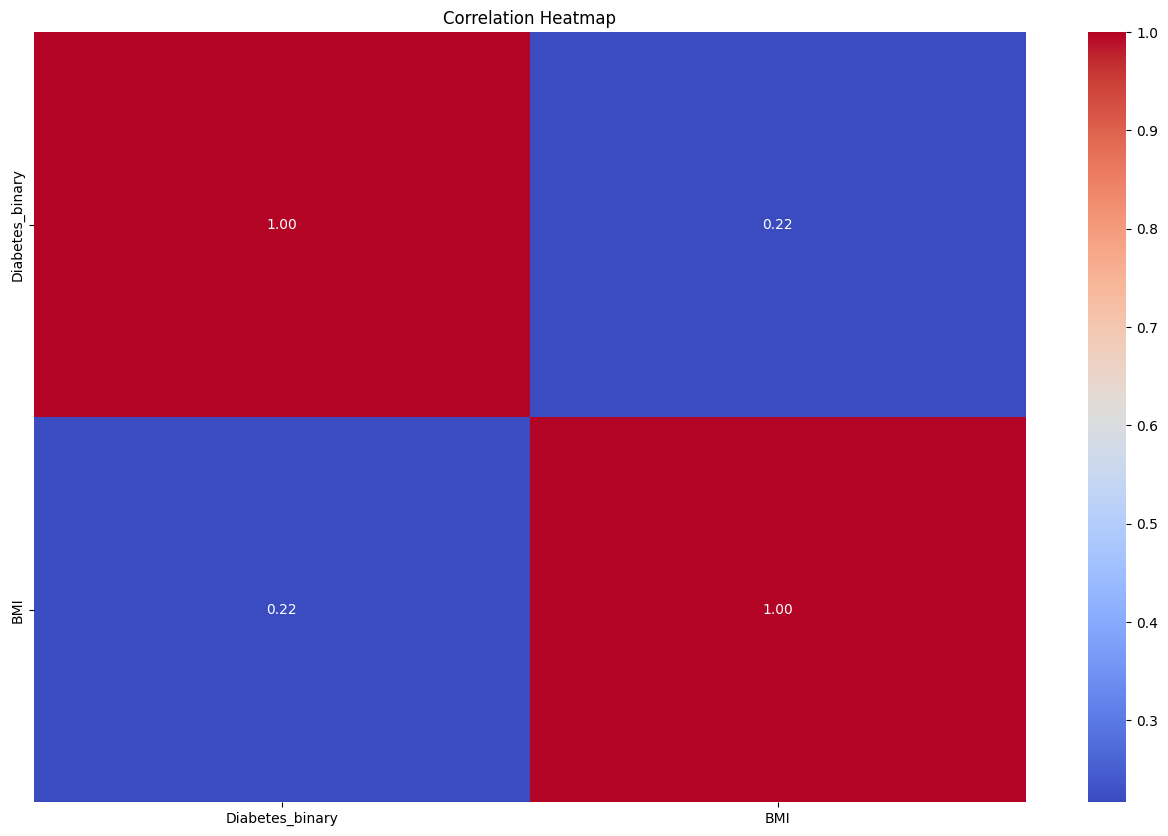

In [ ]:
# Calculate the correlation matrix
correlation_matrix = original_set[
    ['Diabetes_binary', 'BMI']
].corr()

# Generate a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
original_set.describe()

,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,126839.500000,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,73231.252481,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,63419.750000,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,126839.500000,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,190259.250000,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,253679.000000,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
original_set.isnull().sum()

# EDA - Visualization

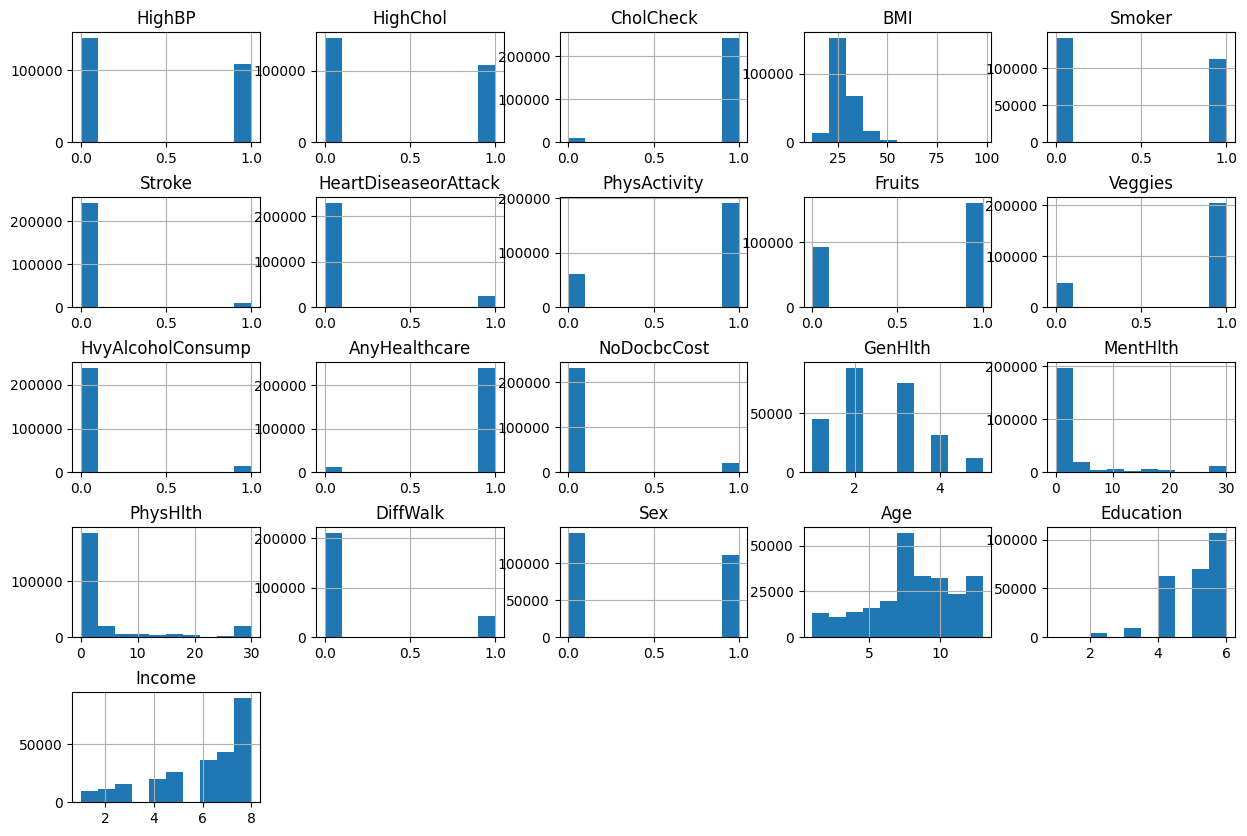

In [ ]:
# Plot histograms
X.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)
plt.show()

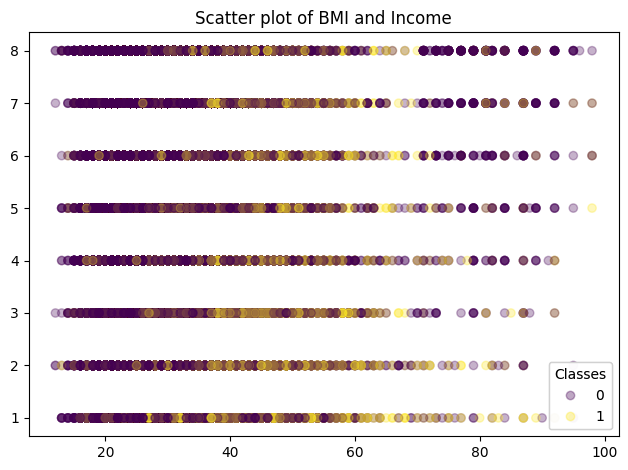

In [ ]:
fig, ax = plt.subplots()

col1 = "BMI"
col2 = "Income"

scatter = ax.scatter(X[col1], X[col2], c=y["Diabetes_binary"], alpha=0.3)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Classes")
ax.add_artist(legend1)
ax.set_title(f"Scatter plot of {col1} and {col2}")

plt.tight_layout()
plt.show()

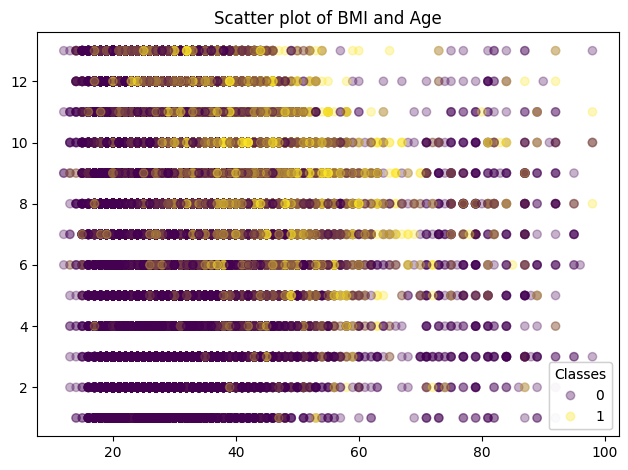

In [ ]:
fig, ax = plt.subplots()

col1 = "BMI"
col2 = "Age"

scatter = ax.scatter(X[col1], X[col2], c=y["Diabetes_binary"], alpha=0.3)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Classes")
ax.add_artist(legend1)
ax.set_title(f"Scatter plot of {col1} and {col2}")

plt.tight_layout()
plt.show()

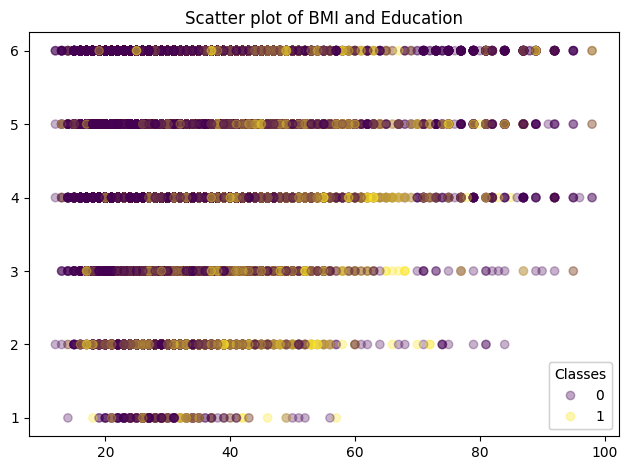

In [ ]:
fig, ax = plt.subplots()

col1 = "BMI"
col2 = "Education"

scatter = ax.scatter(X[col1], X[col2], c=y["Diabetes_binary"], alpha=0.3)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Classes")
ax.add_artist(legend1)
ax.set_title(f"Scatter plot of {col1} and {col2}")

plt.tight_layout()
plt.show()

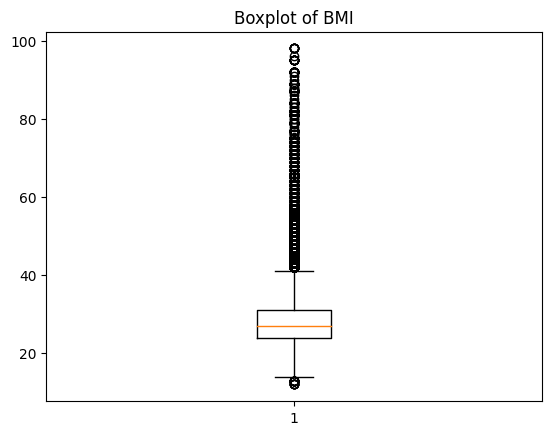

In [ ]:
plt.boxplot(original_set['BMI'])
plt.title('Boxplot of BMI')
plt.show()


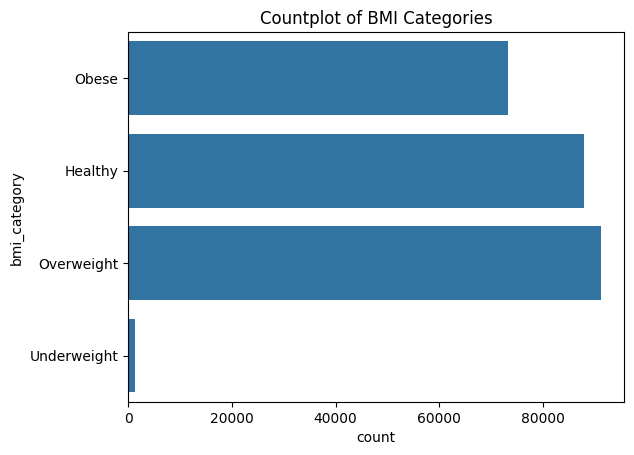

In [ ]:
bmi_analysis = pd.DataFrame(original_set['BMI'].value_counts(ascending=False)).reset_index()

def categorize_bmi(bmi):
  if bmi < 18:
    return "Underweight"
  elif bmi >= 18 and bmi <= 25:
    return "Healthy"
  elif bmi >= 26 and bmi <= 30:
    return "Overweight"
  else:
    return "Obese"

original_set['bmi_category'] = original_set['BMI'].apply(categorize_bmi)
pd.DataFrame(original_set['bmi_category'].value_counts()).reset_index()

import matplotlib.pyplot as plt
sns.countplot(original_set['bmi_category'])
plt.title('Countplot of BMI Categories')
plt.show()

In [ ]:
# Calculate the correlation matrix for numerical feature
correlation_matrix = original_set[
    ['Diabetes_binary', 'BMI']
].corr()

# Generate a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

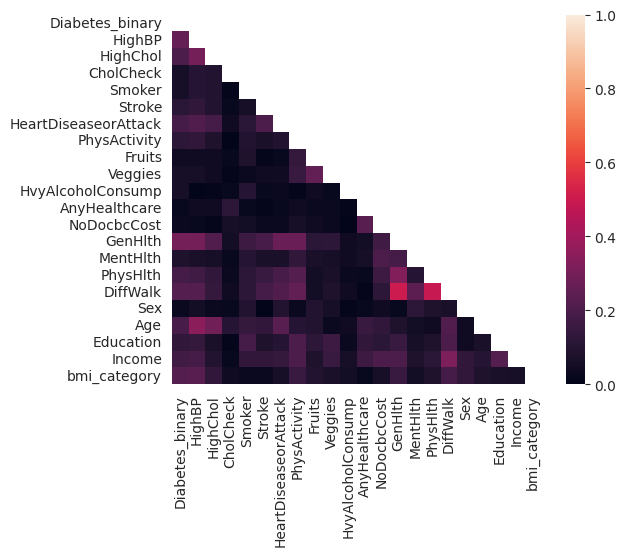

In [ ]:
#calculating correlation matrix for cateogrical features using cramer's v matrix (CODE TAKEN FROM KAGGLE)
#THIS IS ALSO A TEST OF INDEPENDENCE
original_set_categorical=original_set[['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income', 'bmi_category']]

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return np.sqrt(stat/(obs*mini))

rows= []

for var1 in original_set_categorical:
  col = []
  for var2 in original_set_categorical :
    cramers =cramers_V(original_set_categorical[var1], original_set_categorical[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V
  rows.append(col)

cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = original_set_categorical.columns, index =original_set_categorical.columns)


mask = np.zeros_like(df, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True




with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True)

plt.show()

In [16]:
class_1_data = original_set[original_set['Diabetes_binary']==1]

class_0_data = original_set[original_set['Diabetes_binary']==0]

#### **1. High BP, High Chol, BMI, CholCheck**


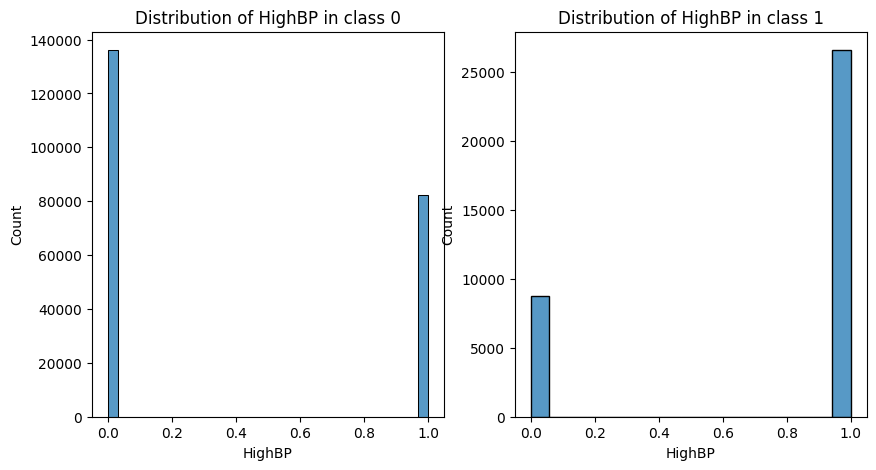

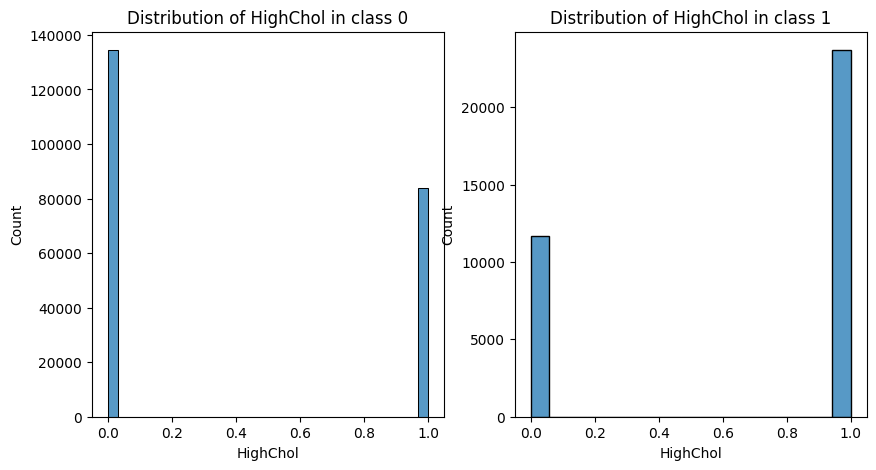

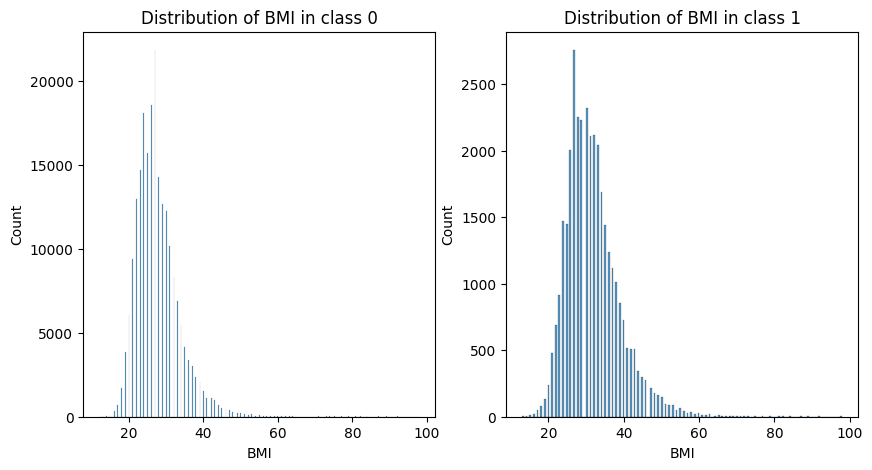

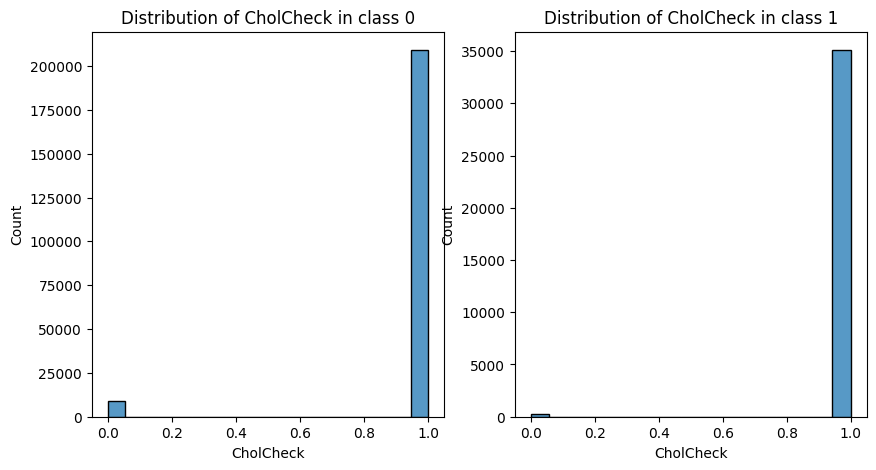

In [17]:
features = ['HighBP', 'HighChol', 'BMI', 'CholCheck']
for feature in features:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(class_0_data[feature], kde=False)
    plt.title(f'Distribution of {feature} in class 0')

    plt.subplot(1, 2, 2)
    sns.histplot(x=class_1_data[feature])
    plt.title(f'Distribution of {feature} in class 1')
    plt.show()


#### **2. Lifestyle Factors**

In [18]:
# lifestyle_features = ['Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump']
# for feature in lifestyle_features:
#     plt.figure(figsize=(6, 4))
#     sns.countplot(x=feature, data=original_set)
#     plt.title(f'Count Plot of {feature}')
#     plt.show()

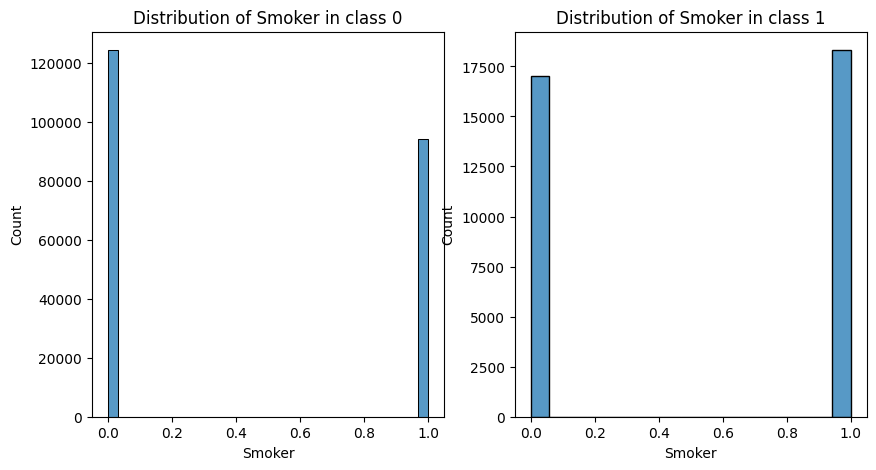

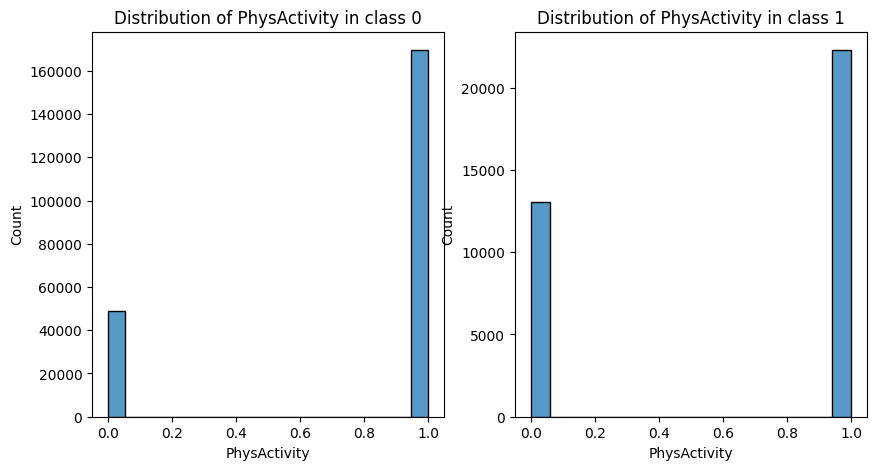

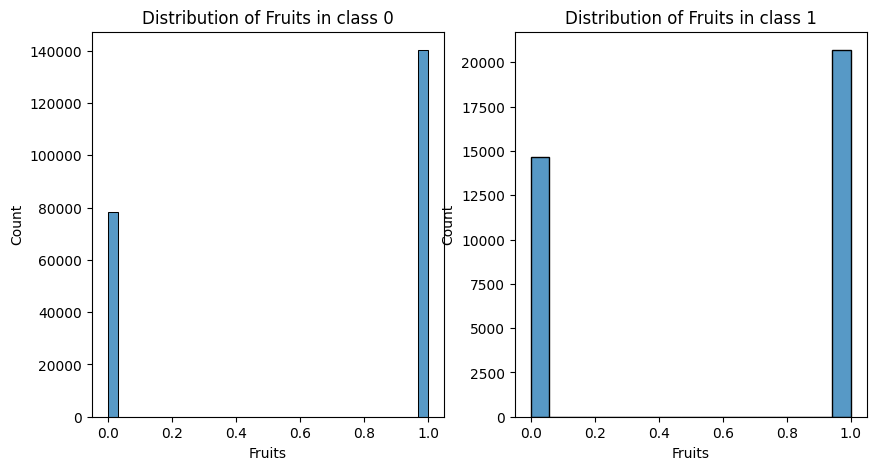

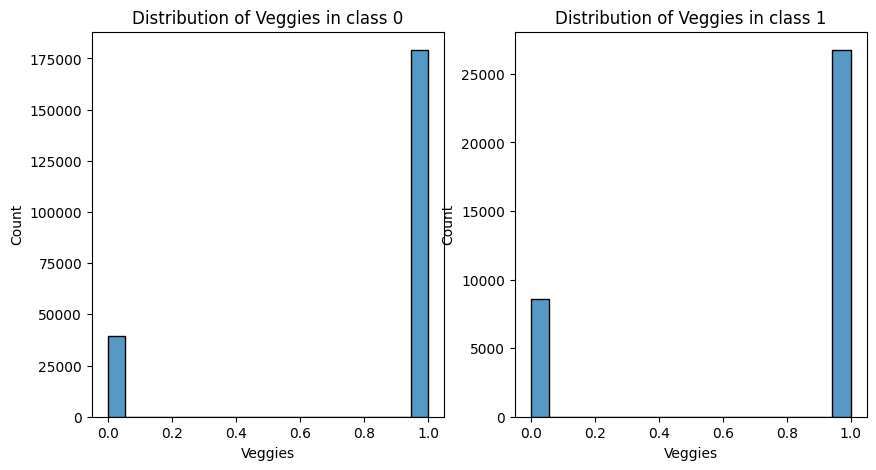

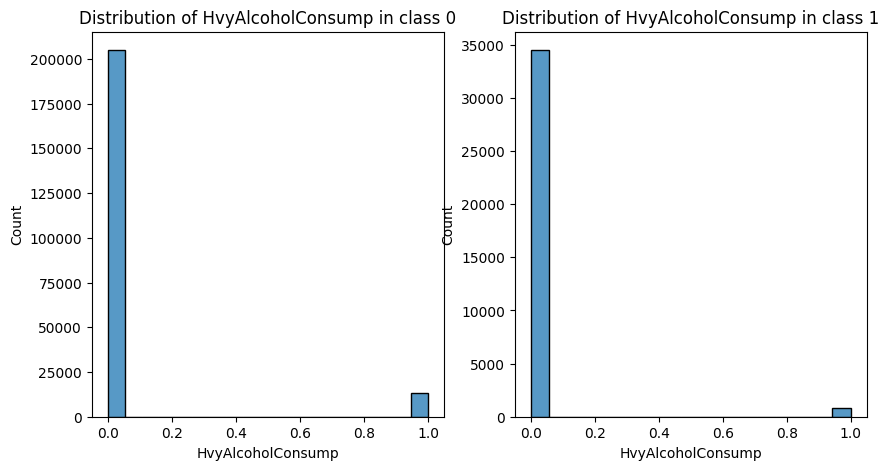

In [19]:
lifestyle_features = ['Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump']
for feature in lifestyle_features:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(class_0_data[feature])
    plt.title(f'Distribution of {feature} in class 0')

    plt.subplot(1, 2, 2)
    sns.histplot(x=class_1_data[feature])
    plt.title(f'Distribution of {feature} in class 1')
    plt.show()

#### **3. Medical History**

In [20]:
# medical_features = ['Stroke', 'HeartDiseaseorAttack']
# for feature in medical_features:
#     plt.figure(figsize=(6, 4))
#     sns.countplot(x=feature, data=original_set)
#     plt.title(f'Count Plot of {feature}')
#     plt.show()


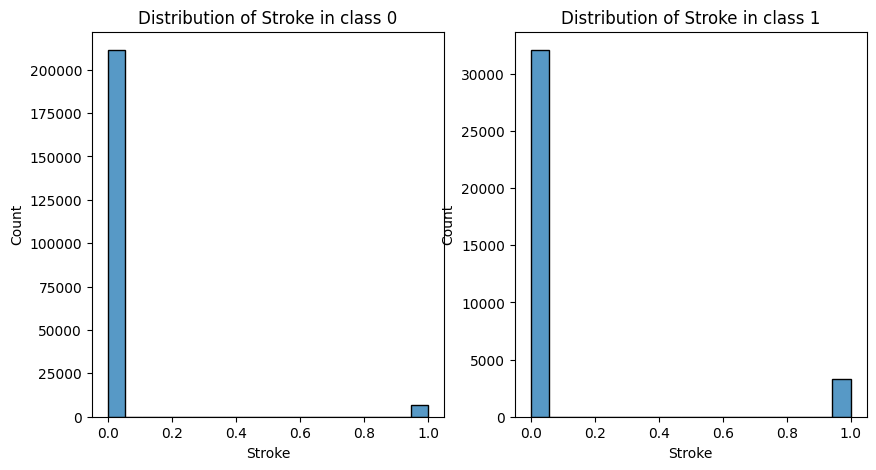

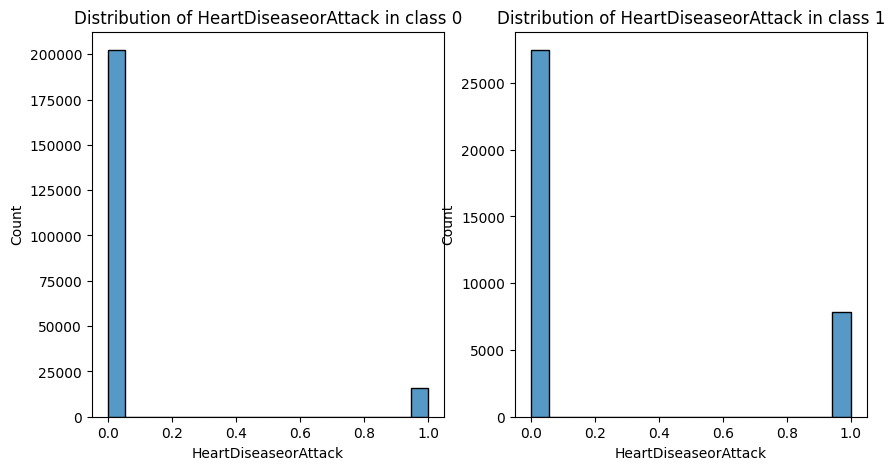

In [21]:
medical_features = ['Stroke', 'HeartDiseaseorAttack']
for feature in medical_features:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(class_0_data[feature])
    plt.title(f'Distribution of {feature} in class 0')

    plt.subplot(1, 2, 2)
    sns.histplot(x=class_1_data[feature])
    plt.title(f'Distribution of {feature} in class 1')
    plt.show()

#### **4. Healthcare Accessibility**

In [22]:
# healthcare_features = ['AnyHealthcare', 'NoDocbcCost']
# for feature in healthcare_features:
#     plt.figure(figsize=(6, 4))
#     sns.countplot(x=feature, data=original_set)
#     plt.title(f'Count Plot of {feature}')
#     plt.show()


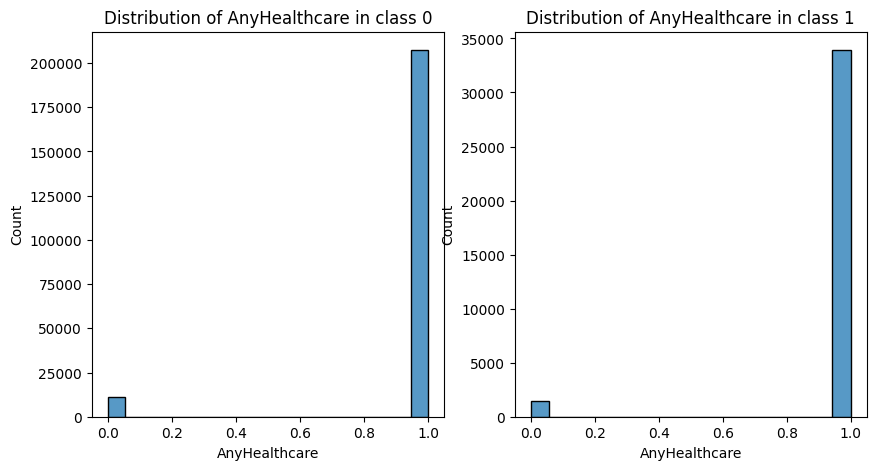

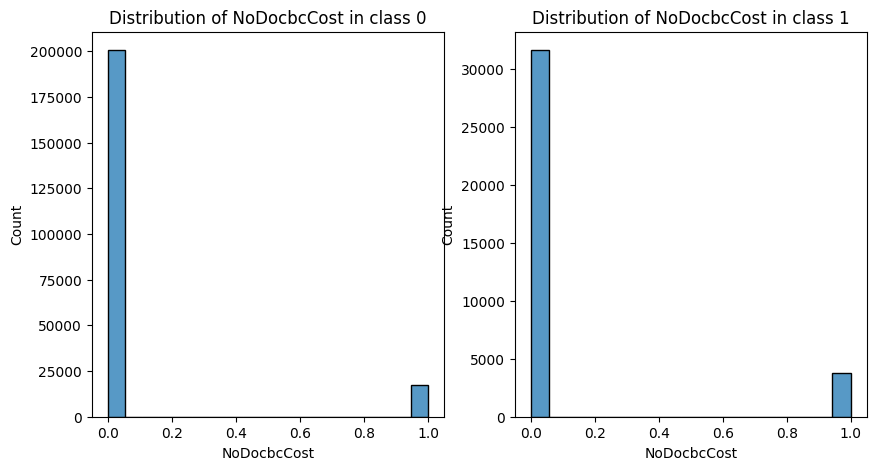

In [23]:
healthcare_features = ['AnyHealthcare', 'NoDocbcCost']
for feature in healthcare_features:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(class_0_data[feature])
    plt.title(f'Distribution of {feature} in class 0')

    plt.subplot(1, 2, 2)
    sns.histplot(x=class_1_data[feature])
    plt.title(f'Distribution of {feature} in class 1')
    plt.show()

#### **5. Health Status**

In [24]:
# health_status_features = ['GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk']
# for feature in health_status_features:
#     plt.figure(figsize=(10, 5))
#     if original_set[feature].dtype == 'O' or len(original_set[feature].unique()) <= 10:
#         sns.countplot(x=feature, data=original_set)
#         plt.title(f'Count Plot of {feature}')
#     else:
#         sns.histplot(original_set[feature], kde=False)
#         plt.title(f'Distribution of {feature}')
#     plt.show()


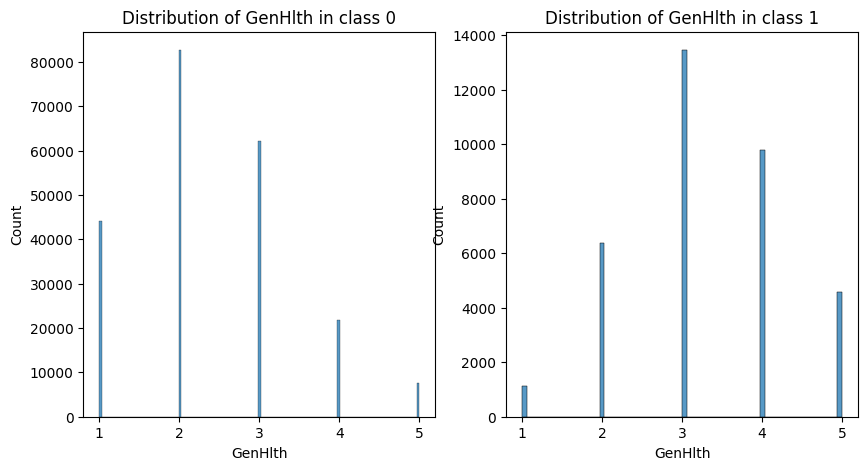

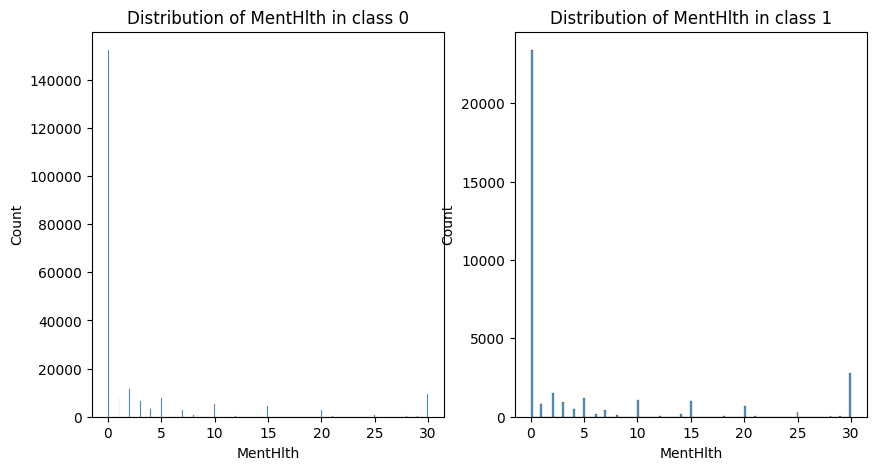

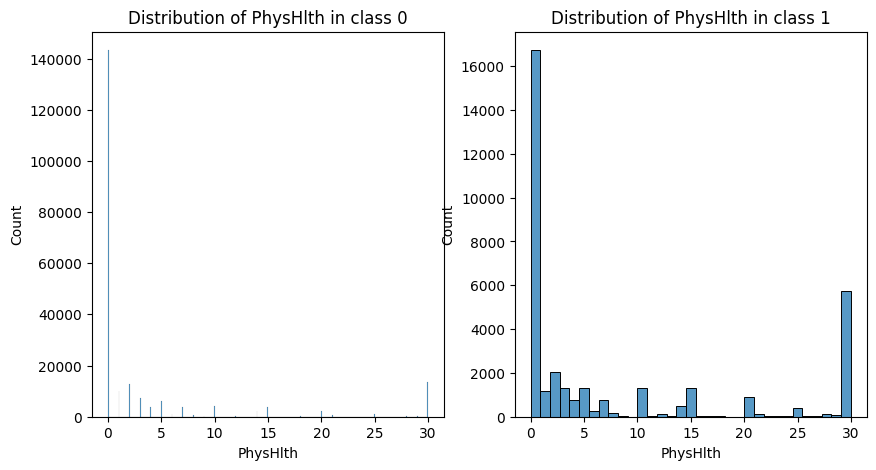

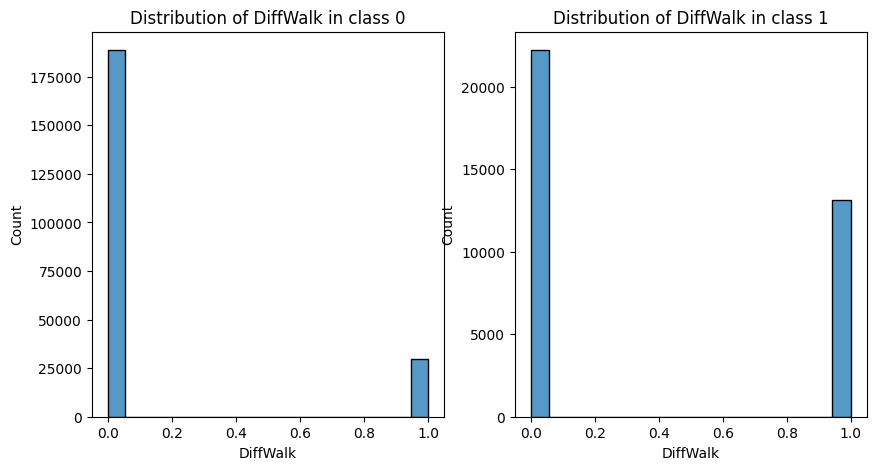

In [25]:
health_status_features = ['GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk']
for feature in health_status_features:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(class_0_data[feature])
    plt.title(f'Distribution of {feature} in class 0')

    plt.subplot(1, 2, 2)
    sns.histplot(x=class_1_data[feature])
    plt.title(f'Distribution of {feature} in class 1')
    plt.show()

#### **6. Demographics**

In [26]:
# demographic_features = ['Sex', 'Age', 'Education', 'Income']
# for feature in demographic_features:
#     plt.figure(figsize=(10, 5))
#     if original_set[feature].dtype == 'O' or len(original_set[feature].unique()) <= 10:
#         sns.countplot(x=feature, data=original_set)
#         plt.title(f'Count Plot of {feature}')
#     else:
#         sns.histplot(original_set[feature], bins=20, kde=False)
#         plt.title(f'Distribution of {feature}')
#     plt.show()


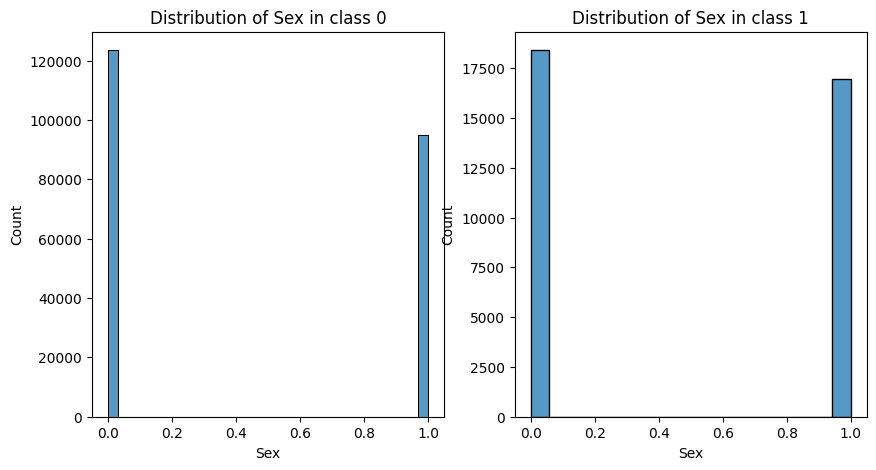

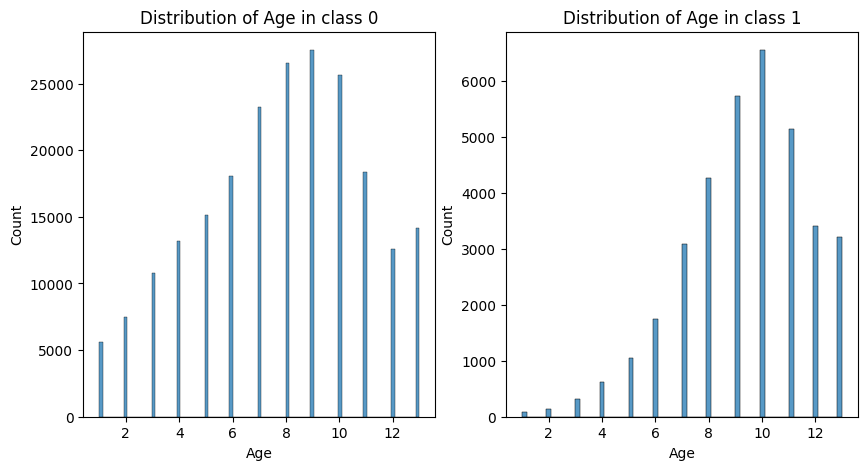

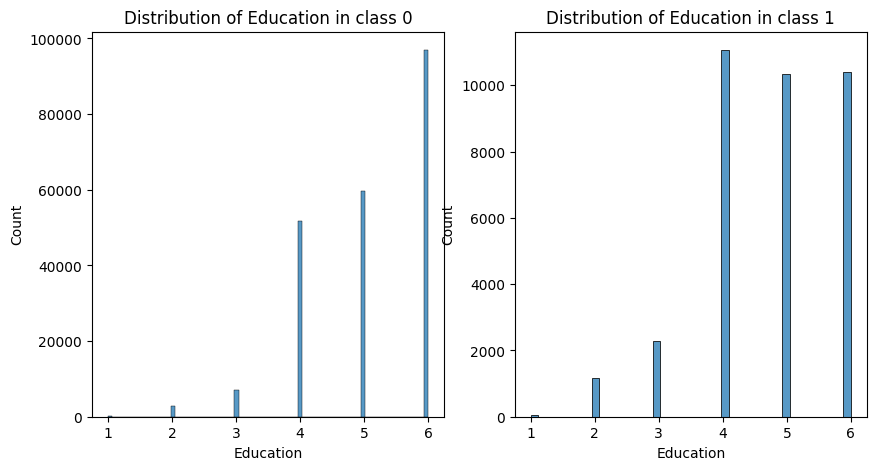

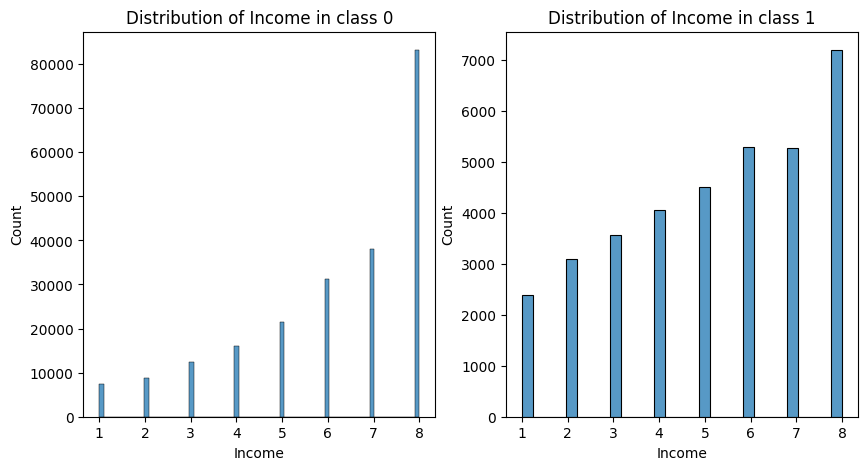

In [27]:
demographic_features = ['Sex', 'Age', 'Education', 'Income']
for feature in demographic_features:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(class_0_data[feature])
    plt.title(f'Distribution of {feature} in class 0')

    plt.subplot(1, 2, 2)
    sns.histplot(x=class_1_data[feature])
    plt.title(f'Distribution of {feature} in class 1')
    plt.show()

In [28]:
original_set.columns

Index(['ID', 'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income'],
      dtype='object')

Understanding after EDA -

1. There are not many features that truly separate diabetic from the non-diabetic
2. Demographic features are more or less the same in both cases- with some skewness seen towards higher levels of income and education in class 0 and class 1
3. Almost all features are non-correlated with the target
4. Only some features show promising difference between diabetic and non-diabetic



# Model implementation

## Naive Bayes

In [29]:
class CategoricalNaiveBayes:
    def __init__(self):
        self.class_probabilities = {}
        self.feature_probabilities = {}

    def fit(self, X_train, y_train):
        # Calculate class probabilities
        total_samples = len(y_train)
        classes, counts = np.unique(y_train, return_counts=True)
        for i in range(len(classes)):
            self.class_probabilities[classes[i]] = counts[i] / total_samples

        # Calculate feature probabilities for each class
        for c in self.class_probabilities:
            class_indices = y_train[y_train == c].index
            class_data = X_train.loc[class_indices]
            total_class_samples = len(class_indices)
            class_feature_probs = {}
            for column in class_data.columns:
                feature_values, feature_counts = np.unique(class_data[column], return_counts=True)
                feature_probs = {}
                for i in range(len(feature_values)):
                    feature_probs[feature_values[i]] = (feature_counts[i] + 1) / (total_class_samples + len(feature_values))
                class_feature_probs[column] = feature_probs
            self.feature_probabilities[c] = class_feature_probs

    def _predict_instance(self, instance):
        class_scores = {}
        for c in self.class_probabilities:
            class_score = np.log(self.class_probabilities[c])
            for feature_name, feature_value in instance.items():
                if feature_value in self.feature_probabilities[c][feature_name]:
                    class_score += np.log(self.feature_probabilities[c][feature_name][feature_value])
                else:
                    # Laplace smoothing for unseen feature values
                    class_score += np.log(1 / (len(self.feature_probabilities[c][feature_name]) + 1))
            class_scores[c] = class_score
        return max(class_scores, key=class_scores.get)

    def predict(self, X_test):
        return [self._predict_instance(instance) for _, instance in X_test.iterrows()]

## Decision tree - XGBoost

In [30]:
from posixpath import split
import numpy as np

class DecisionTree:
    def __init__(self, max_depth=3):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.tree = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        if len(set(y)) == 1 or depth == self.max_depth:
            return np.mean(y)

        feature_index, threshold = self._find_best_split(X, y)

        # left_indices = X[:, feature_index] < threshold
        # right_indices = ~left_indices

        if feature_index == None: # No split can meaningfully divide the set
            return np.mean(y)

        right_indices = X[:, feature_index] > threshold
        left_indices = ~right_indices

        left_subtree = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self._grow_tree(X[right_indices], y[right_indices], depth + 1)

        return (feature_index, threshold, left_subtree, right_subtree)

    # Assume that each feature's values are discrete
    def _find_best_split(self, X, y):
        best_gain = 0
        best_feature_index = None
        best_threshold = None



        for feature_index in range(X.shape[1]):

### ATTEMPT 3

            # Sort the feature values and corresponding targets
            sorted_indices = X[:, feature_index].argsort()
            feature_values = X[sorted_indices, feature_index]
            targets = y[sorted_indices]

            # Compute the unique thresholds before the loop over the data points
            thresholds, t_counts = np.unique(feature_values, return_counts=True)

            # Check if all feature values are the same
            if len(thresholds) == 1:
                continue

            # Compute the cumulative sums of the targets and their squares
            cumsum_y = np.cumsum(targets)
            cumsum_y_squared = np.cumsum(targets ** 2)

            # Compute the sums of the targets and their squares in the right child for each split point
            sum_y_right = cumsum_y[-1] - cumsum_y
            sum_y_squared_right = cumsum_y_squared[-1] - cumsum_y_squared

            # Compute the variance of the targets in the left and right child for each split point
            var_left = cumsum_y_squared - cumsum_y ** 2 / np.arange(1, len(y) + 1)
            var_right = sum_y_squared_right[0:len(y)-1] - sum_y_right[0:len(y)-1] ** 2 / np.arange(len(y) - 1, 0, -1)

            # Compute the total variance for each split point
            var_total = var_left[0:len(y)-1] + var_right

            # Find the best split point
            split_indices = np.cumsum(t_counts)
            split_indices -= 1
            # print(f'{split_indices} {thresholds}')
            var_at_split = var_total[split_indices[0:len(thresholds)-1]]

            best_split_index = np.argmin(var_at_split)

            gain = var_total[0] - var_total[best_split_index]

            if gain > best_gain:
                best_gain = gain
                best_feature_index = feature_index
                best_threshold = thresholds[best_split_index]


            # print(f'{X.shape} {feature_index}')
            # print(f'{best_gain} {best_feature_index} {best_threshold} {best_split_index}')

### ATTEMPT 1 & 2

        # for feature_index in range(X.shape[1]):

        #     # Sort the feature values and corresponding targets
        #     sorted_indices = X[:, feature_index].argsort()
        #     feature_values = X[sorted_indices, feature_index]
        #     targets = y[sorted_indices]


        #     # impurity of the current set

        #     n1 = np.sum(targets)
        #     n0 = X.shape[0] - n1
        #     p1 = n1 / X.shape[0]
        #     p0 = 1 - p1
        #     P_impure = 1 - (p1 ** 2) - (p0 ** 2)

        #     thresholds = np.unique(X[:, feature_index])

        #     # Check if all feature values are the same. This mean that no split is possible/meaningful
        #     if len(thresholds) == 1:
        #         continue


        #     # Loop: Calculate the cumulative sum of target, since our task is binary
        #     # impurity = 1 - (p(c1)^2 + p(c0)^2)
        #     # weighted impurity = impurity * weight
        #     # gain = current impurity - (weighted impurity class 1 + weighted impurity class 0)
        #     # these information are calculated at split point, using threshold

        #     cumulative = 0
        #     gains = []
        #     last_Xvalue = feature_values[0]
        #     for i in range(X.shape[0]):
        #         cumulative += targets[i]
        #         # Detect split point
        #         if feature_values[i] != last_Xvalue:
        #             last_Xvalue = feature_values[i]
        #             n0_ = i - cumulative

        #             # Weighted left and right impure
        #             l_impure = self._binary_impurity(cumulative, n0_)
        #             r_impure = self._binary_impurity(n1 - cumulative, n0 - n0_)

        #             # gain
        #             gains.append(P_impure - l_impure - r_impure)

        #     gain = np.max(gains)

        #     if gain > best_gain:
        #         best_gain = gain

        #         # Find the best split point
        #         best_split_index = np.argmax(gains)
        #         best_feature_index = feature_index
        #         best_threshold = thresholds[best_split_index]


### ORIGINAL CODE


            # for threshold in thresholds:
            #     left_indices = X[:, feature_index] < threshold
            #     right_indices = ~left_indices

            #     if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
            #         continue

            #     gain = self._calculate_gain(y, y[left_indices], y[right_indices])

            #     if gain > best_gain:
            #         best_gain = gain
            #         best_feature_index = feature_index
            #         best_threshold = threshold

        return best_feature_index, best_threshold

    def _binary_impurity(self, n1, n0):
        if (n1 == 0) or (n0 == 0): # no class 0 or class 1, i.e. the set has only 1 class
            return 0
        t = n1 + n0
        p1 = n1 / t
        p0 = n0 / t
        return 1 - (p1 ** 2) - (p0 ** 2)

    def _calculate_gain(self, y, left_y, right_y):
        parent_impurity = self._calculate_impurity(y)
        left_impurity = self._calculate_impurity(left_y)
        right_impurity = self._calculate_impurity(right_y)

        left_weight = len(left_y) / len(y)
        right_weight = len(right_y) / len(y)

        return parent_impurity - (left_weight * left_impurity + right_weight * right_impurity)

    def _calculate_impurity(self, y):
        unique_classes, class_counts = np.unique(y, return_counts=True)
        probabilities = class_counts / len(y)
        return 1 - np.sum(probabilities ** 2)

    def predict(self, X):
        return np.array([self._predict_tree(x, self.tree) for x in X])

    def _predict_tree(self, x, tree):
        if isinstance(tree, np.float64):
            return tree

        feature_index, threshold, left_subtree, right_subtree = tree

        if x[feature_index] < threshold:
            return self._predict_tree(x, left_subtree)
        else:
            return self._predict_tree(x, right_subtree)

class GradientBoosting:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=2):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        residual = y.astype(np.float64)
        for _ in tqdm(range(self.n_estimators)):
            tree = DecisionTree(max_depth=self.max_depth)
            tree.fit(X, residual)
            self.trees.append(tree)
            predictions = tree.predict(X)
            residual -= self.learning_rate * predictions

    def predict(self, X):
        predictions = np.zeros(len(X))
        for tree in self.trees:
            predictions += self.learning_rate * tree.predict(X)
        return predictions

# Handling class imbalance

## Applying SMOTE

SMOTE should only be apllied to the training set only. Dataset should be split into train and test first so that test set is not affected.

Also from this point, use X (from the data importing code) instead of original_set, since it contains the ID field

Re-sampled_set is the data after oversampling using SMOTE technique

In [31]:
from imblearn.over_sampling import SMOTE
import sklearn
import pandas as pd
from tqdm import tqdm

In [32]:
y = y['Diabetes_binary'] # This changes the shape from (n, 1) to (n) array

In [33]:
# Instantiate SMOTE
smote = SMOTE()

# Split data

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.3, shuffle = True)

# Apply SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Concatenate the resampled features and target variable into a new DataFrame
resampled_set = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Diabetes_binary')], axis=1)

# Check the shape of the resampled set
print("Shape of resampled set:", resampled_set.shape)


Shape of resampled set: (305698, 22)


### Naive Bayes

In [34]:
# X and y from resampled set

NB_X_train = resampled_set.drop(columns=['Diabetes_binary'])
NB_y_train = resampled_set['Diabetes_binary']

# # Define the ratio for train-test split
# train_ratio = 0.7
# test_ratio = 1 - train_ratio

# # Calculate the number of samples for training and testing
# num_train_samples = int(len(resampled_set) * train_ratio)
# num_test_samples = len(resampled_set) - num_train_samples

# # Shuffle the dataset
# resampled_set = resampled_set.sample(frac=1, random_state=42).reset_index(drop=True)

# # Split the dataset into training and testing sets
# X_train = resampled_set.iloc[:num_train_samples, :-1]
# y_train = resampled_set.iloc[:num_train_samples, -1]
# X_test = resampled_set.iloc[num_train_samples:, :-1]
# y_test = resampled_set.iloc[num_train_samples:, -1]

# # Reset the index for the training and testing sets
# X_train.reset_index(drop=True, inplace=True)
# y_train.reset_index(drop=True, inplace=True)
# X_test.reset_index(drop=True, inplace=True)
# y_test.reset_index(drop=True, inplace=True)

NB_X_train.reset_index(drop=True, inplace=True)
NB_y_train.reset_index(drop=True, inplace=True)
NB_X_test = X_test.reset_index(drop=True)
NB_y_test = y_test.reset_index(drop=True)

In [35]:
# Instantiate the model, fit and predict

model_NB = CategoricalNaiveBayes()
model_NB.fit(NB_X_train, NB_y_train)

predictions = model_NB.predict(NB_X_test)

In [36]:
# Function to obtain performance metrics

def evaluation(y_true, y_pred):

    true_positive = 0
    false_positive = 0
    false_negative = 0
    for i in range(len(y_test)):
      if (y_true[i] == 1) & (y_pred[i] == 1):
        true_positive+=1
      elif (y_true[i] == 0) & (y_pred[i] == 1):
        false_positive+=1
      elif (y_true[i] == 1) & (y_pred[i] == 0):
        false_negative+=1

    accuracy = np.mean(y_true == y_pred)
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    f1 = 2 * (precision * recall) / (precision + recall)

    return accuracy, precision, recall, f1

In [37]:
# Show metrics

metrics = evaluation(NB_y_test, predictions)

print('Accuracy', metrics[0])
print('Precision', metrics[1])
print('Recall', metrics[2])
print('F1 Score', metrics[3])

Accuracy 0.7269131714495953
Precision 0.29925738663295937
Recall 0.713438176852811
F1 Score 0.4216502017531654


In [38]:
print(sklearn.metrics.classification_report(NB_y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.73      0.82     65485
           1       0.30      0.71      0.42     10619

    accuracy                           0.73     76104
   macro avg       0.62      0.72      0.62     76104
weighted avg       0.85      0.73      0.77     76104



##### Decision Trees

Boositng algorithm - Boosting methods iteratively build multiple weak learners and combine them to form a strong learner. By sequentially adding models that focus on the misclassified samples of the previous models, boosting reduces bias and variance, leading to improved generalization performance.

### XG boost

In [39]:
DT_X_train = resampled_set.drop(columns=['Diabetes_binary']).values
DT_y_train = resampled_set['Diabetes_binary'].values

# Instantiate GradientBoosting model
gb_model = GradientBoosting(n_estimators=100, learning_rate=0.1, max_depth=4)

# Fit the model to the resampled data
gb_model.fit(DT_X_train, DT_y_train)

100%|██████████| 100/100 [05:42<00:00,  3.42s/it]


In [40]:
# Predict on the resampled data
pred = gb_model.predict(X_test.values)

# Calculate accuracy, precision, and recall
def accuracy(y_true, y_pred):
    return np.mean(y_true == np.round(y_pred))

def precision(y_true, y_pred):
    tp = np.sum((y_true == 1) & (np.round(y_pred) == 1))
    fp = np.sum((y_true == 0) & (np.round(y_pred) == 1))
    return tp / (tp + fp)

def recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (np.round(y_pred) == 1))
    fn = np.sum((y_true == 1) & (np.round(y_pred) == 0))
    return tp / (tp + fn)

print("Accuracy:", accuracy(y_test, pred))
print("Precision:", precision(y_test, pred))
print("Recall:", recall(y_test, pred))

Accuracy: 0.6558787974350888
Precision: 0.2555422973057841
Recall: 0.7663621809963274


In [41]:
print(sklearn.metrics.classification_report(y_test, np.round(pred)))

              precision    recall  f1-score   support

           0       0.94      0.64      0.76     65485
           1       0.26      0.77      0.38     10619

    accuracy                           0.66     76104
   macro avg       0.60      0.70      0.57     76104
weighted avg       0.85      0.66      0.71     76104



### Neural network

In [42]:
import tensorflow
import keras
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.utils import to_categorical
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# import pandas as pd
# import numpy as np

# Define model architecture
nn_model = keras.models.Sequential()
nn_model.add(keras.layers.Dense(32, input_dim=X_resampled.shape[1], activation='relu'))  # Input layer
nn_model.add(keras.layers.Dense(16, activation='relu'))  # Hidden layer
nn_model.add(keras.layers.Dense(16, activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l2(0.01))) #Regularizatiion
nn_model.add(keras.layers.Dropout(0.5))
nn_model.add(keras.layers.Dense(1, activation='sigmoid'))  # Output layer

nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stopping = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Class weight
class_weight_dict = {0: 1.,  # Majority class
                     1: 1.5}  # Minority class

# Train model
nn_model.fit(X_resampled, y_resampled,
             epochs=10,
             class_weight=class_weight_dict,
             validation_split=0.2,
             batch_size=32,
             #callbacks=[early_stopping]
             )

Epoch 1/10
7643/7643 [==============================] - 21s 3ms/step - loss: 0.6842 - accuracy: 0.7014 - val_loss: 0.4956 - val_accuracy: 0.8323
Epoch 2/10
7643/7643 [==============================] - 20s 3ms/step - loss: 0.6408 - accuracy: 0.7229 - val_loss: 0.4885 - val_accuracy: 0.8330
Epoch 3/10
7643/7643 [==============================] - 21s 3ms/step - loss: 0.6365 - accuracy: 0.7251 - val_loss: 0.4719 - val_accuracy: 0.8179
Epoch 4/10
7643/7643 [==============================] - 20s 3ms/step - loss: 0.6333 - accuracy: 0.7269 - val_loss: 0.4859 - val_accuracy: 0.8271
Epoch 5/10
7643/7643 [==============================] - 21s 3ms/step - loss: 0.6323 - accuracy: 0.7271 - val_loss: 0.4905 - val_accuracy: 0.7833
Epoch 6/10
7643/7643 [==============================] - 23s 3ms/step - loss: 0.6314 - accuracy: 0.7263 - val_loss: 0.4197 - val_accuracy: 0.8519
Epoch 7/10
7643/7643 [==============================] - 23s 3ms/step - loss: 0.6303 - accuracy: 0.7267 - val_loss: 0.5942 - val_ac

In [43]:
# Make predictions on the test set
y_pred = nn_model.predict(X_test)

y_pred = np.round(y_pred)

# Calculate recall, precision, and F1 score
recall = sklearn.metrics.recall_score(y_test, y_pred)
precision = sklearn.metrics.precision_score(y_test, y_pred)
f1 = sklearn.metrics.f1_score(y_test, y_pred)

# Print the scores
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

# Print confusion matrix
print(sklearn.metrics.confusion_matrix(y_test, y_pred))

print(sklearn.metrics.classification_report(y_test, y_pred))

2379/2379 [==============================] - 4s 2ms/step
Recall: 0.7686222808174028
Precision: 0.28271562175268444
F1 Score: 0.4133809415280204
[[44777 20708]
 [ 2457  8162]]
              precision    recall  f1-score   support

           0       0.95      0.68      0.79     65485
           1       0.28      0.77      0.41     10619

    accuracy                           0.70     76104
   macro avg       0.62      0.73      0.60     76104
weighted avg       0.86      0.70      0.74     76104



## ROC Curve

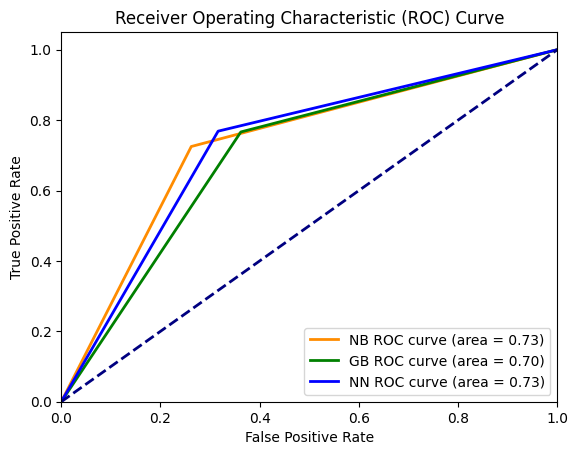

In [60]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr_nb, tpr_nb, _ = roc_curve(NB_y_test, predictions)
fpr_gb, tpr_gb, _ = roc_curve(y_test, np.round(pred))
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred)

# Calculate the area under the curve (AUC)
roc_auc_nb = auc(fpr_nb, tpr_nb)
roc_auc_gb = auc(fpr_gb, tpr_gb)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Plot ROC curve
plt.figure()
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label='NB ROC curve (area = %0.2f)' % roc_auc_nb)
plt.plot(fpr_gb, tpr_gb, color='green', lw=2, label='GB ROC curve (area = %0.2f)' % roc_auc_gb)
plt.plot(fpr_nn, tpr_nn, color='blue', lw=2, label='NN ROC curve (area = %0.2f)' % roc_auc_nn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Not handling class imbalance

Use X_train, X_test, y_train, y_test

### Naive Bayes

In [44]:
# X and y from resampled set

NB_X_train = X_train.reset_index(drop=True)
NB_y_train = y_train.reset_index(drop=True)
NB_X_test = X_test.reset_index(drop=True)
NB_y_test = y_test.reset_index(drop=True)

In [61]:
# Instantiate the model, fit

model_NB = CategoricalNaiveBayes()
model_NB.fit(NB_X_train, NB_y_train)

In [62]:
# Prediction
predictions_nb = model_NB.predict(NB_X_test)

In [63]:
# Show metrics

metrics = evaluation(NB_y_test, predictions_nb)

print('Accuracy', metrics[0])
print('Precision', metrics[1])
print('Recall', metrics[2])
print('F1 Score', metrics[3])

print(sklearn.metrics.classification_report(NB_y_test, predictions_nb))

Accuracy 0.8117313150425733
Precision 0.3727266488230046
Recall 0.5114417553441943
F1 Score 0.4312028582770941
              precision    recall  f1-score   support

           0       0.92      0.86      0.89     65485
           1       0.37      0.51      0.43     10619

    accuracy                           0.81     76104
   macro avg       0.64      0.69      0.66     76104
weighted avg       0.84      0.81      0.82     76104



### Decision Trees

In [64]:
# Instantiate GradientBoosting model
gb_model = GradientBoosting(n_estimators=100, learning_rate=0.1, max_depth=4)

# Fit the model to the resampled data
gb_model.fit(X_train.values, y_train.values)

100%|██████████| 100/100 [03:16<00:00,  1.96s/it]


In [65]:
# Predict on the resampled data
pred_gb = gb_model.predict(X_test.values)

# Calculate accuracy, precision, and recall
def accuracy(y_true, y_pred):
    return np.mean(y_true == np.round(y_pred))

def precision(y_true, y_pred):
    tp = np.sum((y_true == 1) & (np.round(y_pred) == 1))
    fp = np.sum((y_true == 0) & (np.round(y_pred) == 1))
    return tp / (tp + fp)

def recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (np.round(y_pred) == 1))
    fn = np.sum((y_true == 1) & (np.round(y_pred) == 0))
    return tp / (tp + fn)

print("Accuracy:", accuracy(y_test, pred_gb))
print("Precision:", precision(y_test, pred_gb))
print("Recall:", recall(y_test, pred_gb))

Accuracy: 0.8604935351624093
Precision: 0.5009191176470589
Recall: 0.051323100103587906


In [66]:
print(sklearn.metrics.classification_report(y_test, np.round(pred_gb)))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92     65485
           1       0.50      0.05      0.09     10619

    accuracy                           0.86     76104
   macro avg       0.68      0.52      0.51     76104
weighted avg       0.81      0.86      0.81     76104



### Neural Network

In [67]:
import tensorflow
import keras
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.utils import to_categorical
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# import pandas as pd
# import numpy as np

# Define model architecture
nn_model = keras.models.Sequential()
nn_model.add(keras.layers.Dense(32, input_dim=X_train.shape[1], activation='relu'))  # Input layer
nn_model.add(keras.layers.Dense(16, activation='relu'))  # Hidden layer
nn_model.add(keras.layers.Dense(16, activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l2(0.01))) #Regularizatiion
nn_model.add(keras.layers.Dropout(0.5))
nn_model.add(keras.layers.Dense(1, activation='sigmoid'))  # Output layer

nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stopping = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Class weight
class_weight_dict = {0: 1.,  # Majority class
                     1: 1.5}  # Minority class

# Train model
nn_model.fit(X_train, y_train,
             epochs=10,
             class_weight=class_weight_dict,
             validation_split=0.2,
             batch_size=32,
             #callbacks=[early_stopping]
             )

Epoch 1/10
4440/4440 [==============================] - 13s 3ms/step - loss: 0.4685 - accuracy: 0.8592 - val_loss: 0.3491 - val_accuracy: 0.8593
Epoch 2/10
4440/4440 [==============================] - 11s 3ms/step - loss: 0.4286 - accuracy: 0.8608 - val_loss: 0.3315 - val_accuracy: 0.8584
Epoch 3/10
4440/4440 [==============================] - 11s 3ms/step - loss: 0.4243 - accuracy: 0.8610 - val_loss: 0.3571 - val_accuracy: 0.8591
Epoch 4/10
4440/4440 [==============================] - 12s 3ms/step - loss: 0.4224 - accuracy: 0.8612 - val_loss: 0.3309 - val_accuracy: 0.8599
Epoch 5/10
4440/4440 [==============================] - 12s 3ms/step - loss: 0.4199 - accuracy: 0.8614 - val_loss: 0.3259 - val_accuracy: 0.8616
Epoch 6/10
4440/4440 [==============================] - 12s 3ms/step - loss: 0.4192 - accuracy: 0.8615 - val_loss: 0.3331 - val_accuracy: 0.8612
Epoch 7/10
4440/4440 [==============================] - 12s 3ms/step - loss: 0.4177 - accuracy: 0.8615 - val_loss: 0.3283 - val_ac

In [70]:
# Make predictions on the test set
y_pred = nn_model.predict(X_test)

y_pred_nn = np.round(y_pred)

# Calculate recall, precision, and F1 score
recall = sklearn.metrics.recall_score(y_test, y_pred_nn)
precision = sklearn.metrics.precision_score(y_test, y_pred_nn)
f1 = sklearn.metrics.f1_score(y_test, y_pred_nn)

# Print the scores
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

# Print confusion matrix
print(sklearn.metrics.confusion_matrix(y_test, y_pred_nn))

print(sklearn.metrics.classification_report(y_test, y_pred_nn))

2379/2379 [==============================] - 6s 2ms/step
Recall: 0.2368396270835295
Precision: 0.5203807159114422
F1 Score: 0.3255242039865389
[[63167  2318]
 [ 8104  2515]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     65485
           1       0.52      0.24      0.33     10619

    accuracy                           0.86     76104
   macro avg       0.70      0.60      0.62     76104
weighted avg       0.84      0.86      0.84     76104



## ROC Curve

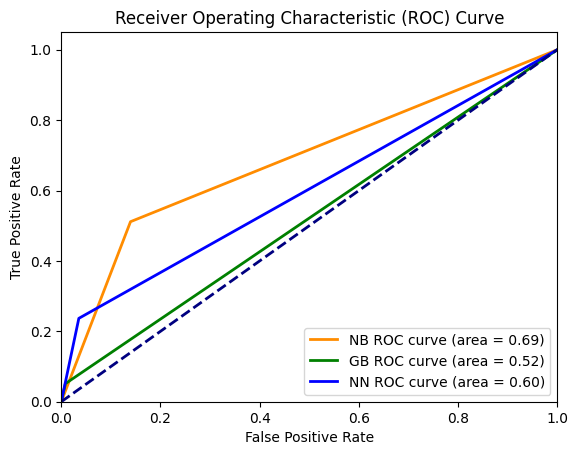

In [71]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr_nb, tpr_nb, _ = roc_curve(NB_y_test, predictions_nb)
fpr_gb, tpr_gb, _ = roc_curve(y_test, np.round(pred_gb))
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_nn)

# Calculate the area under the curve (AUC)
roc_auc_nb = auc(fpr_nb, tpr_nb)
roc_auc_gb = auc(fpr_gb, tpr_gb)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Plot ROC curve
plt.figure()
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label='NB ROC curve (area = %0.2f)' % roc_auc_nb)
plt.plot(fpr_gb, tpr_gb, color='green', lw=2, label='GB ROC curve (area = %0.2f)' % roc_auc_gb)
plt.plot(fpr_nn, tpr_nn, color='blue', lw=2, label='NN ROC curve (area = %0.2f)' % roc_auc_nn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()